In [1]:
# EDA
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pingouin import ttest

# ML 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, auc, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Otimização de Hiperparâmetros
import optuna

In [2]:
df_frutas = pd.read_csv('./datasets/fruit_quality.csv')

In [12]:
df_frutas.head(10)

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984   
5 -3.425400 -1.409082  -1.913511    -0.555775  -3.853071  1.914616 -2.981523   
6  1.331606  1.635956   0.875974    -1.677798   3.106344 -1.847417  2.414171   
7 -1.995462 -0.428958   1.530644    -0.742972   0.158834  0.974438 -1.470125   
8 -3.867632 -3.734514   0.986429    -1.207655   2.292873  4.080921 -4.871905   
9 -0.727983 -0.442820  -4.092223     0.597513   0.393714  1.620857  2.185608   

   Quality  
0        1  
1        1  
2        0  
3        1  
4        1  
5        0  
6        1  
7        1  
8        0  
9        0

In [11]:
df_frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 250.1 KB


### EDA

In [5]:
# Distribuição da Variável Target - Percentual
px.bar(df_frutas.value_counts('Quality') / len(df_frutas) * 100)

In [7]:
# Transformar a variável Quality em numérica (0 e 1)
df_frutas['Quality'] = (df_frutas['Quality'] == 'good').astype(int)

In [10]:
# Remover a coluna A_id, pois não tem poder preditivo 
df_frutas.drop(columns=['A_id'], axis=1, inplace=True)

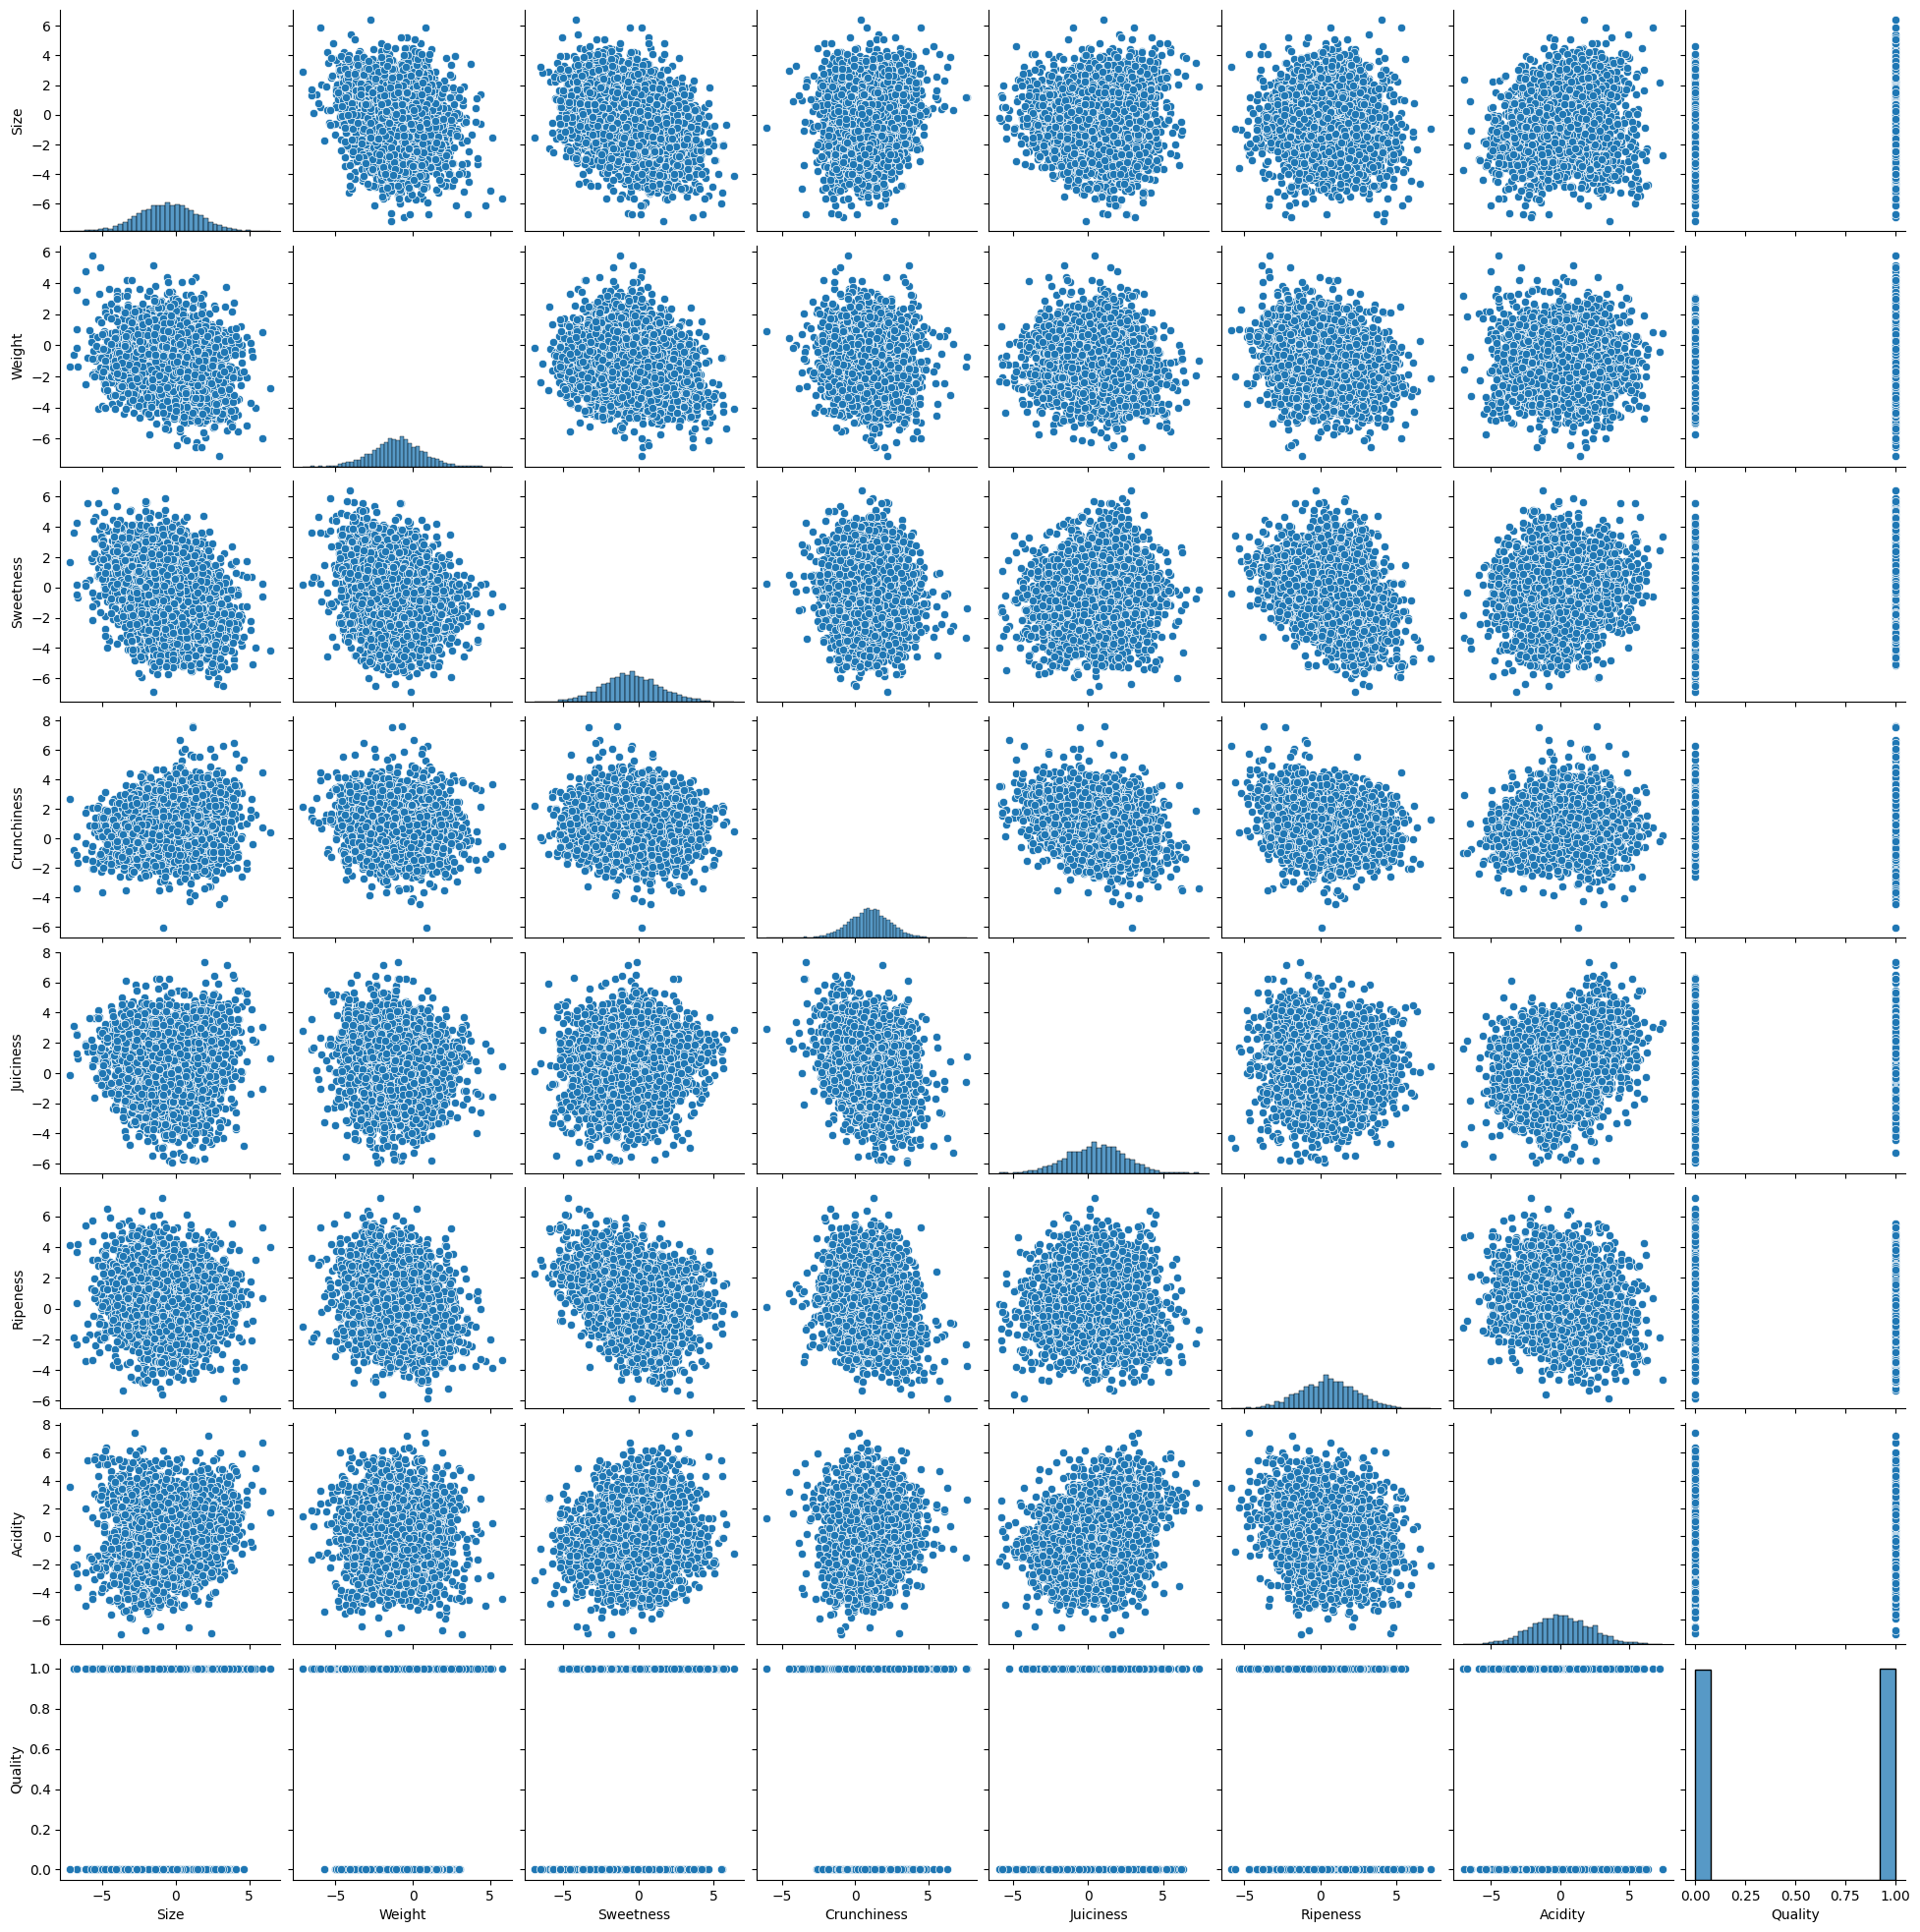

In [13]:
# Verificar distribuição e a correlação de variáveis numa forma visual
sns.pairplot(df_frutas, diag_kind='hist')

In [14]:
# BoxPlot Quality x Weight
px.box(df_frutas, x='Quality', y='Weight', color='Quality')

In [15]:
# BoxPlot Quality x Sweetness
px.box(df_frutas, x='Quality', y='Sweetness', color='Quality')

In [16]:
# BoxPlot Quality x Size
px.box(df_frutas, x='Quality', y='Size', color='Quality')

In [17]:
# Teste de T-Student
# Um teste estatístico para verificar se existe uma diferença significativa entre as médias de 2 grupos
# H0 - Não há diferença significativa entre as médias dos grupos
# H1 - Há diferença significativa entre as médias dos grupos
grupo_good_weight = df_frutas[df_frutas['Quality'] == 1]['Weight']
grupo_bad_weight = df_frutas[df_frutas['Quality'] == 0]['Weight']
ttest(x=grupo_good_weight, y=grupo_bad_weight, paired=False)

T          dof alternative     p-val         CI95%   cohen-d  \
T-test  0.089906  3599.742464   two-sided  0.928367  [-0.09, 0.1]  0.002841   

         BF10     power  
T-test  0.036  0.050925

Não há diferença significativa das médias de peso entre frutas boas e ruins

In [19]:
grupo_good_sweetness = df_frutas[df_frutas['Quality'] == 1]['Sweetness']
grupo_bad_sweetness = df_frutas[df_frutas['Quality'] == 0]['Sweetness']
ttest(x=grupo_good_sweetness, y=grupo_bad_sweetness, paired=False)

T          dof alternative         p-val         CI95%  \
T-test  16.396437  3995.125489   two-sided  1.590329e-58  [0.86, 1.09]   

        cohen-d       BF10  power  
T-test  0.51847  7.576e+54    1.0

Há diferença significativa das médias de peso entre frutas boas e ruins

In [20]:
grupo_good_size = df_frutas[df_frutas['Quality'] == 1]['Size']
grupo_bad_size = df_frutas[df_frutas['Quality'] == 0]['Size']
ttest(x=grupo_good_size, y=grupo_bad_size, paired=False)

T          dof alternative         p-val         CI95%  \
T-test  15.912978  3951.450727   two-sided  2.602204e-55  [0.82, 1.06]   

        cohen-d       BF10 power  
T-test   0.5031  5.053e+51   NaN

Há diferença significativa das médias de peso entre frutas boas e ruins

In [21]:
# Corr Matrix
corr_matrix = df_frutas.corr()
corr_matrix

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Size         1.000000 -0.170702  -0.324680     0.169868  -0.018892 -0.134773   
Weight      -0.170702  1.000000  -0.154246    -0.095882  -0.092263 -0.243824   
Sweetness   -0.324680 -0.154246   1.000000    -0.037552   0.095882 -0.273800   
Crunchiness  0.169868 -0.095882  -0.037552     1.000000  -0.259607 -0.201982   
Juiciness   -0.018892 -0.092263   0.095882    -0.259607   1.000000 -0.097144   
Ripeness    -0.134773 -0.243824  -0.273800    -0.201982  -0.097144  1.000000   
Acidity      0.196218  0.016414   0.085999     0.069943   0.248714 -0.202669   
Quality      0.244007  0.001421   0.250998    -0.012376   0.260223 -0.264315   

              Acidity   Quality  
Size         0.196218  0.244007  
Weight       0.016414  0.001421  
Sweetness    0.085999  0.250998  
Crunchiness  0.069943 -0.012376  
Juiciness    0.248714  0.260223  
Ripeness    -0.202669 -0.264315  
Acidity      1.000000 -0.007697  
Quality     -0.007697  1.000000

In [23]:
# Plot Heatmap
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr_matrix.columns,
        y = corr_matrix.index,
        z = np.array(corr_matrix),
        text = corr_matrix.values,
        texttemplate='%{text:.2f}',
        colorscale=px.colors.diverging.RdBu,
        zmin=-1,
        zmax=1
    )
)

fig.show()

### Treinar Modelo Baseline

In [24]:
X = df_frutas.drop(columns=['Quality'], axis=1)
y = df_frutas['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [25]:
# Criar o Objrto do Algoritmo Logistica
# Para datasets pequenos, o solver liblinear é um dos indicados na documentação do sklearn
model_lr = LogisticRegression(solver='liblinear')

In [26]:
# Treinar Modelo
model_lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

### Métricas Baseline

In [ ]:
# Retornar a classificação predita com base no conjunto de testes
y_pred = model_lr.predict(X_test)

In [30]:
# Decision Function retorna o valor calculado (score) de cada omstância, considerando os coeficientes obtidos
y_decision = model_lr.decision_function(X_test)

In [31]:
# Retornar as probabilidades de cada classes para cada instância no conjunto de testes
y_prob = model_lr.predict_proba(X_test)

In [32]:
# Retornar os valores da curva ROC - TPR (True Positive Rate), FPR (False Positive Rate), Threshold
fpr, tpr, thresholds = roc_curve(y_test, y_decision)

In [34]:
# Calcular o AUC ( Área Under the Curve), com base nos valores da curva ROC
roc_auc = auc(fpr, tpr)
roc_auc

0.8414568425263345

In [36]:
# Plotar Curva ROC com valor de AUC
fig = px.area(
    x=fpr, y=tpr,
    title=f'Curva ROC (AUC={roc_auc:.4f})',
    labels=dict(x='FPR', y='TPR'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()